<a href="https://colab.research.google.com/github/estevaomod/myproject/blob/main/PROJETO_SOJA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA 
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import kaleido #required
kaleido.__version__ #0.2.1
from IPython.display import Image


In [ ]:
#CÓDIGO_PARA_LER_AQRUIVOSDO_DRIVE
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

In [ ]:
#AUTENTICANDO_A_COONTA_DO_DRIVE
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

df=pd.read_excel(r'/content/drive/MyDrive/ECONOMIA/Mestrado KRALHOOO/PY_SOJA .xlsx')

In [ ]:
df

,REGIAO,ANO,AREA_COLHIDA_HC,PREÇO_SC,QUANTIDADE_SC_60KG,PRODUÇÃO_TN(MIL),RECEITA_BRUTA_R$(MIL),DOLAR,CUSTOS
0,CENTRO-OESTE,2009,9900.1,40.000,485581.6667,29134900.0,1.942327e+07,1.9976,NaN
1,CENTRO-OESTE,2010,10539.2,30.220,526445.0000,31586700.0,1.590917e+07,1.7603,NaN
2,CENTRO-OESTE,2011,10819.4,39.010,565648.3333,33938900.0,2.206594e+07,1.6750,NaN
3,CENTRO-OESTE,2012,11495.2,55.060,581746.6667,34904800.0,3.203097e+07,1.9546,NaN
4,CENTRO-OESTE,2013,12778.2,49.880,634856.6667,38091400.0,3.166665e+07,2.1576,NaN
...,...,...,...,...,...,...,...,...,...
65,SUL,2018,11835.1,69.731,679792.1000,40787526.0,4.740258e+07,3.6542,NaN
66,SUL,2019,11879.6,71.896,647736.7000,38864202.0,4.656968e+07,3.9451,NaN
67,SUL,2020,12085.1,90.387,588241.7000,35294502.0,5.316940e+07,5.1558,NaN
68,SUL,2021,12375.3,152.066,717191.7000,43031502.0,1.090605e+08,5.3950,NaN


In [4]:
#SUL
DF_SUL = df[df["REGIAO"]=='SUL']
PROD_SUL = DF_SUL["PRODUÇÃO_TN(MIL)"]
ANO_SUL = DF_SUL["ANO"]

#SUDESTE
DF_SUDESTE = df[df["REGIAO"]=='SUDESTE']
PROD_SUDESTE = DF_SUDESTE["PRODUÇÃO_TN(MIL)"]
ANO_SUDESTE = DF_SUDESTE["ANO"]

#NORTE
DF_NORTE = df[df["REGIAO"]=='NORTE']
PROD_NORTE = DF_NORTE["PRODUÇÃO_TN(MIL)"]
ANO_NORTE = DF_NORTE["ANO"]

#CENTROOESTE
DF_CENTROOESTE = df[df["REGIAO"]=='CENTRO-OESTE']
PROD_CENTROOESTE = DF_CENTROOESTE["PRODUÇÃO_TN(MIL)"]
ANO_CENTROOESTE = DF_CENTROOESTE["ANO"]

#NORDESTE
DF_NORDESTE = df[df["REGIAO"]=='NORDESTE']
PROD_NORDESTE = DF_NORDESTE["PRODUÇÃO_TN(MIL)"]
ANO_NORDESTE = DF_NORDESTE["ANO"]


In [ ]:
#GRAPH_SUL
prdsul = PROD_SUL
anosul = ANO_SUL
fig = go.Figure()
fig.add_trace(go.Scatter(x=anosul, y=prdsul, mode = 'markers', name = 'Região Sul'))
#GRAPH_SUDESTE
prodsudeste = PROD_SUDESTE
anosudeste = ANO_SUDESTE
fig.add_trace(go.Scatter(x=anosudeste, y=prodsudeste, mode = 'lines', name = 'Região Sudeste'))
#GRAPH_NORTE
prodnorte = PROD_NORTE
anonorte = ANO_NORTE
fig.add_trace(go.Scatter(x=anonorte, y=prodnorte, mode = 'lines', name = "Região Norte"))
#GRAPH_CENTROOESTE
prodcentrooeste = PROD_CENTROOESTE
anocentrooeste = ANO_CENTROOESTE
fig.add_trace(go.Scatter(x=anocentrooeste, y=prodcentrooeste, mode = 'lines', name = 'Região Centro-oeste'))
#GRAPH_NORDESTE
prodnordeste = PROD_NORDESTE
anonordeste = ANO_NORDESTE
fig.add_trace(go.Scatter(x=anonordeste, y=prodnordeste, mode = 'lines', name = 'Região Nordeste'))

fig.update_layout(
    title={
        'text': "PRODUÇÃO_TN(MIL)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_yaxes(title_text="Produção em Toneladas")
fig.show()


In [ ]:
#AUMENTANDO O TAMANHO DA IMAGEM
from kaleido.scopes.plotly import PlotlyScope
from IPython.display import Image
import plotly.express as px
img_bytes = fig.to_image(format="png", width=1000, height=500, scale=4, engine='kaleido')
Image(img_bytes)


In [ ]:
#GRAPH_NORTE_OUTRO_DESIGN
prodnorte = PROD_NORTE
anonorte = ANO_NORTE
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=anonorte, y=prodnorte, mode = 'lines', name = "Região Norte"))

fig1.add_trace(go.Bar(x= anonorte, y= prodnorte, name="Quantidade Produzida", text = DF_NORTE["PRODUÇÃO_TN(MIL)"],  
                      textposition='outside'))
fig1.update_traces(texttemplate='%{text:.2s}')
fig1.update_layout(
    title={
        'text': "PRODUÇÃO DE SOJA REGIÃO NORTE",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, )
fig1.update_yaxes(title_text="Produção em Toneladas")
fig1.show()

img_bytes = fig1.to_image(format="png", width=1000, height=600, scale=4)
Image(img_bytes)b


INICIO DO MODELO DE PREVISÃO DE RECEITA


In [ ]:
#GRAPH_DOLAR_SUL
DF_SUL = df[df['REGIAO']=='SUL']
PROD_SUL = DF_SUL['PRODUÇÃO_TN(MIL)']
ANO_SUL = DF_SUL['ANO']
DL_SUL = DF_SUL['DOLAR']

prodsul = PROD_SUL
anosul = ANO_SUL
dlsul = DL_SUL

#GRAPH_DOLAR

fig3 = go.Figure()
fig3.add_trace(go.Bar(x=anosul, y=dlsul, name = "Dolar($)", text = DF_SUL['DOLAR'],
                      textposition = 'outside', marker_color='lightsalmon'))

fig3.update_traces(texttemplate='%{text:$.2s}')
fig3.update_layout(
    title={
        'text': "Dolar",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig3.update_yaxes(title_text="Dolar")

#GRAPH_PROD

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=anosul, y=prodsul, mode = 'lines', name = 'Região Sul', marker_color='lightsalmon'))

fig2.update_layout(
    title={
        'text': "Produção de Soja em toneladas",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig2.update_yaxes(title_text="Toneladas")


fig2.show()
fig3.show()


SEPARANDO OS DANDOS ENTRE PARA TREINO E PARA EXECUÇÃO DO MODELO

In [5]:
X = DF_SUL.drop(['ANO', 'REGIAO', 'RECEITA_BRUTA_R$(MIL)', 'CUSTOS'], axis=1)
Y = DF_SUL['RECEITA_BRUTA_R$(MIL)']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.1, random_state = 2)

MONTANDO O MODELO DE PREVISÃO

In [7]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

AVALIAÇÃO DO MODELO  

In [8]:
training_data_prediction = lin_reg_model.predict(X_train)
erros = metrics.r2_score(Y_train, training_data_prediction)
print("R² é igual a: ", erros)

R² é igual a:  0.9918026760284052


VISUALIZANDO OS RESULTADOS DO MODELO

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Receita verdadeira")
plt.ylabel("Receita estimada")
plt.title("Previsão de receita")

In [62]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=anosul, y=Y_train, name = 'Região Sul Real', mode = 'markers+text', marker_size=6, text = Y_train, textposition='top center', marker_color='green'))
fig4.update_traces(texttemplate='R$ %{text:.2s}')
fig4.add_trace(go.Scatter(x=anosul, y=training_data_prediction, name = 'Região Sul Estimados', marker_size=6, mode = 'markers+text', text = training_data_prediction, textposition='bottom center', marker_color='red'))
fig4.update_traces(texttemplate='R$ %{text:.2s}')
fig4.update_layout(
    title={
        'text': "Receita anual da Soja dados Reais x Previstos",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig4.update_yaxes(title_text="Receita R$")


fig4.show()





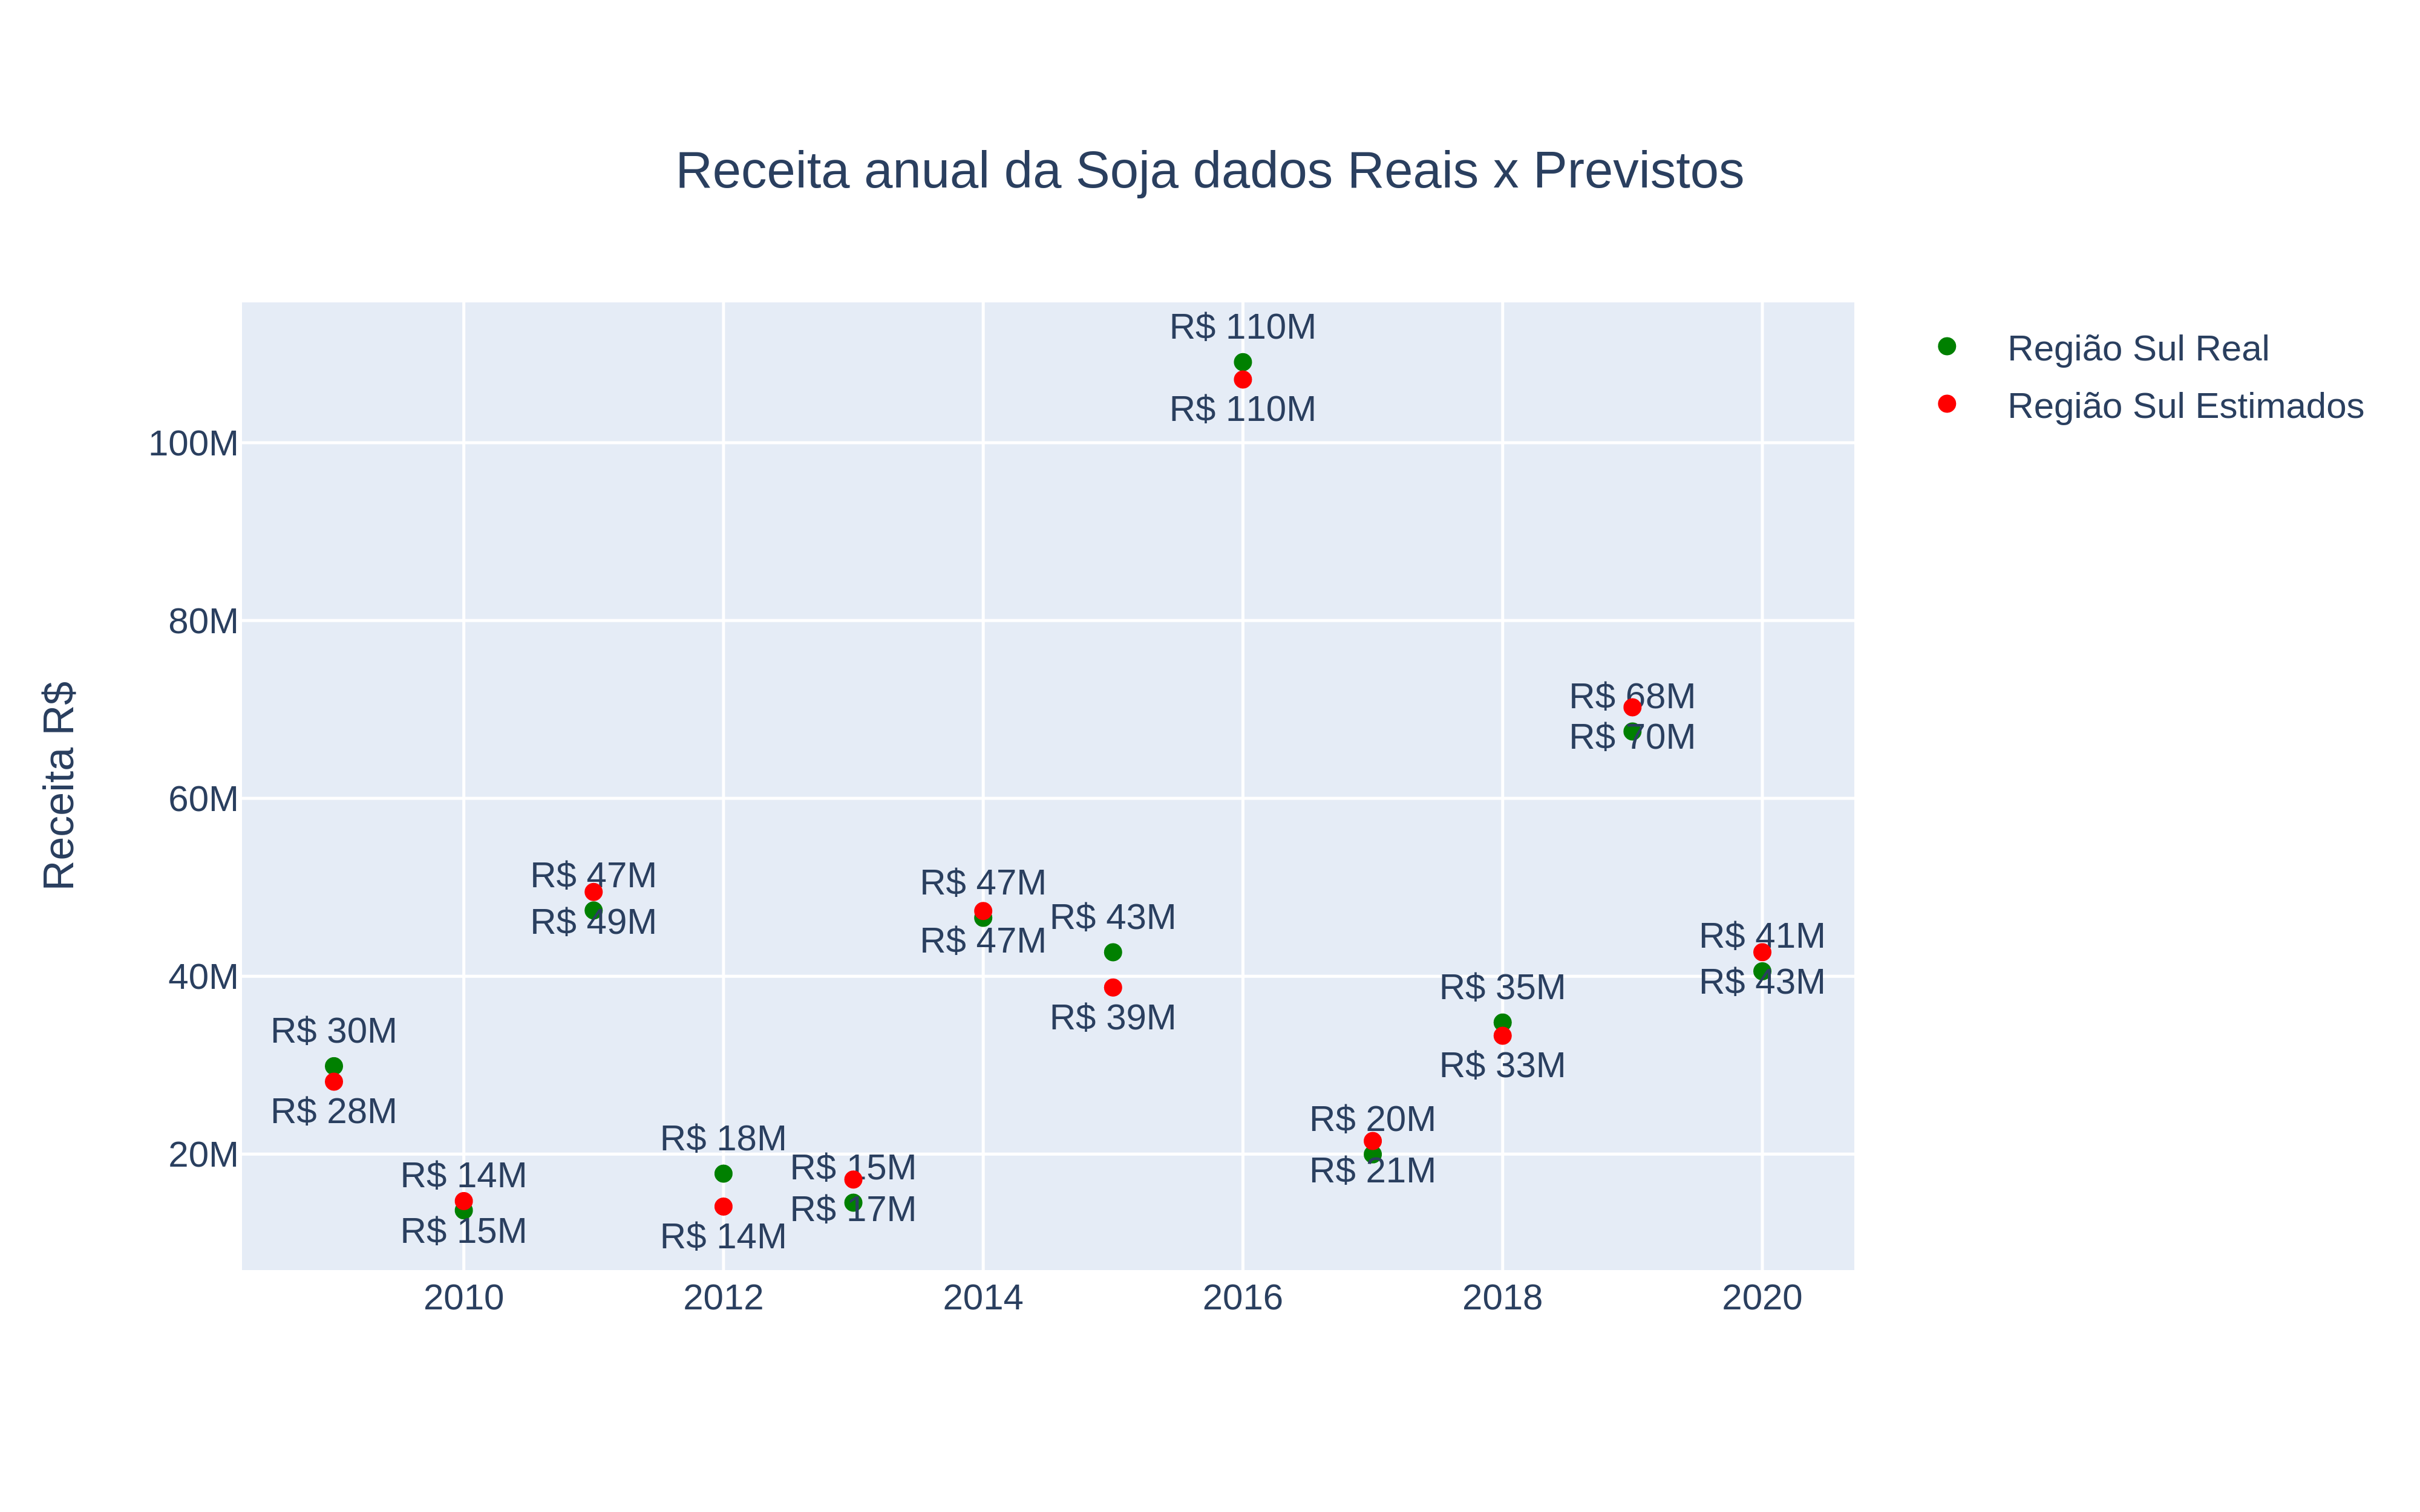

In [69]:
fig4img = fig4.to_image(format='png', width=800, height=500, scale=5)
Image(fig4img)



In [ ]:
#TRANSFORMANDO_EM_DATA_FRAME

#df3 = pd.DataFrame(Y_train)
#DF_SUL["XTRAININGDATA"]= df3
#DF_SUL['YTRAIN'] = pd.Series(Y_train)
#pd.to_numeric(training_data_prediction, downcast='float')
#DF_SUL["XTRAININGDATA"]= pd.Series(training_data_prediction)